In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# What is Machine Learning?

Machine learning is a subfield of artificial intelligence. It involved around building mathematics models from some observed data. These "trained" models are then used for making predictions and other kinds of inference.

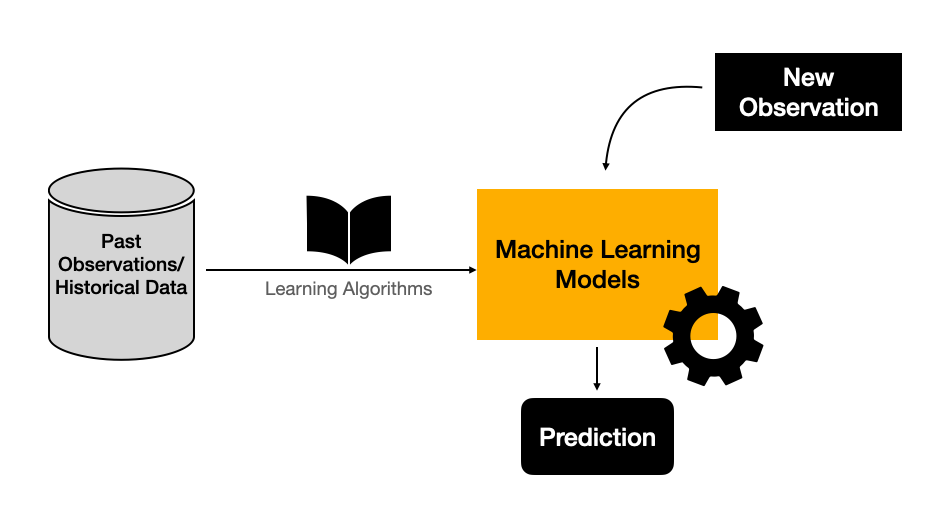

## Supervised and Unsupervised learning

Fundamentally, machine learning can be categorized into two main types: 
1. supervised learning and; 
2. unsupervised learning.

According to Jake VanderPlas (https://github.com/jakevdp/PythonDataScienceHandbook), he gives the following description of the two types as follows.

> _Supervised learning_ involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into classification tasks and regression tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities. We will see examples of both types of supervised learning in the following section.

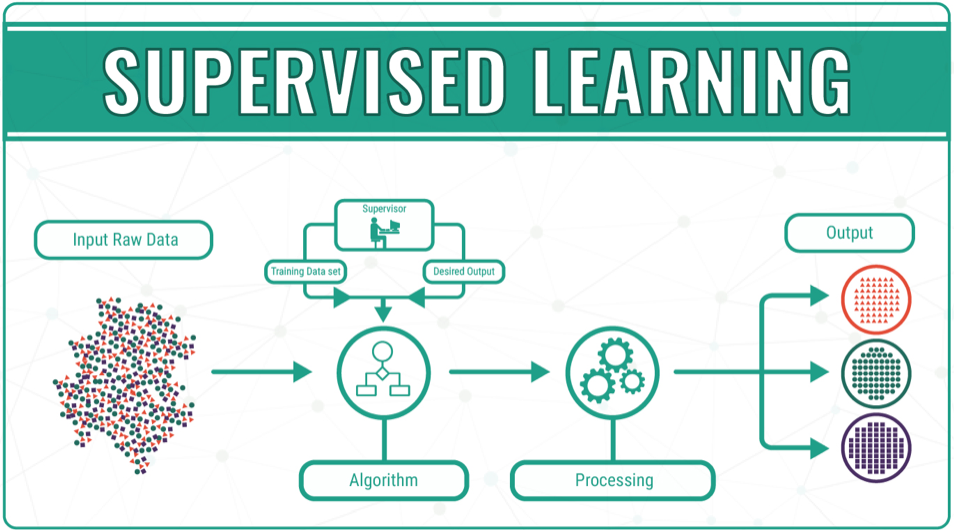

> _Unsupervised learning_ involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself." These models include tasks such as clustering and dimensionality reduction. Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data. We will see examples of both types of unsupervised learning in the following section.

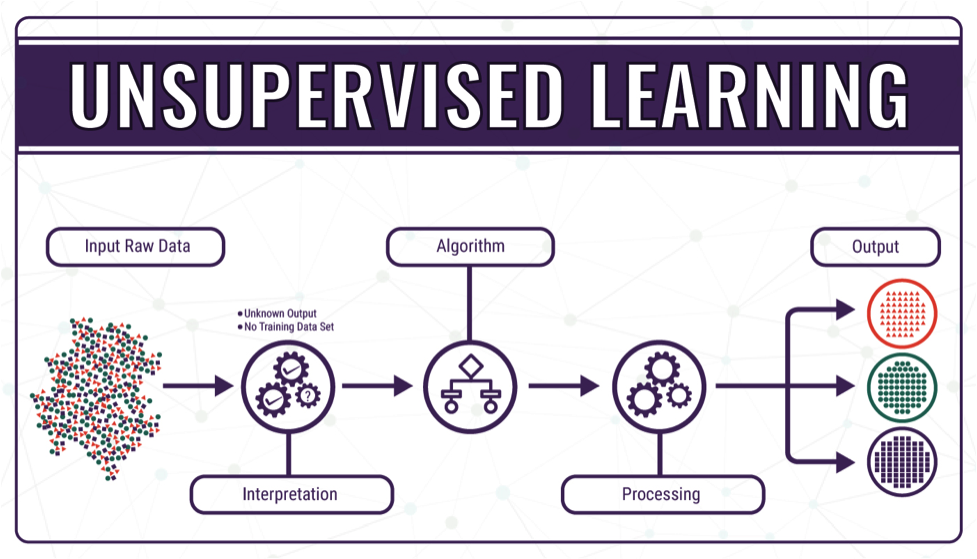

## Machine learning applications

Here are a few applications of machine learning.

#### Supervise Learning

- Regression - learning the relationship between set of features and a continuous value. For example, 
    - stock price prediction
    - demand/supply prediction
    - gas production rate prediction

- Classification - learning the relationship between set of features and a discrete value. For example,
    - image classification
    - machine condition classification
    - facies classification

#### Unsupervice Learning

- Clustering - learning the underlying cluster structure in a dataset
    - traffic flow analysis
    - document grouping



## Typical machine learning workflow 

In short, the principle of machine is as follows:

$$
\text{Observation} \rightarrow \text{Model} \rightarrow \text{Inference}
$$


####  Observations

Observations are basically data that we have collected. We can think of them as a "sample" from a "population". Sometimes we refer to each data point in the sample as an *example* or a *training example*. Each example can have multiple *attributes* or *features*. 

####  Model

A (statistical) model is a summary or a brief description of the observed data. We generally want the model to summarize the data as closely as possibly but also be as simple as possible. A "good" model should also tell us about the population of the sampled data, not just the sample itself. As we generally don't have access to the entire population, so the best we can hope for is to "generalize" from a sample to a population using the model.
 

####  Inference

Once we have created a model, it can then used to make an inference about the "population" or out-of-sample data. 

##  Population and sample

Let's consider the following example. We want to predict gender based on weight and height.

In [2]:
def synthetic_data(N, males, females, seed=101, sd=5):
    np.random.seed(seed)
    m_weight = np.random.randn(N)*sd + males[0]
    m_height = np.random.randn(N)*sd + males[1]
    f_weight = np.random.randn(N)*sd + females[0]
    f_height = np.random.randn(N)*sd + females[1]
    labels = [0]*N + [1]*N
    df = pd.DataFrame()
    df['weight'] = np.hstack([m_weight, f_weight])
    df['height'] = np.hstack([m_height, f_height])
    df['label'] = labels
    return df

population = synthetic_data(200, (70, 170), (50,160), sd=8)
sample = synthetic_data(5, (70, 170), (50,160), sd=8)
sample

,weight,height,label
0,91.654799,167.445456,0
1,75.025062,163.215384,0
2,77.263756,174.847723,0
3,74.030606,153.854654,0
4,75.208944,175.920976,0
5,54.230508,167.640452,1
6,45.287996,161.526355,1
7,51.509562,175.830059,1
8,43.929024,180.847738,1
9,42.534102,165.468071,1


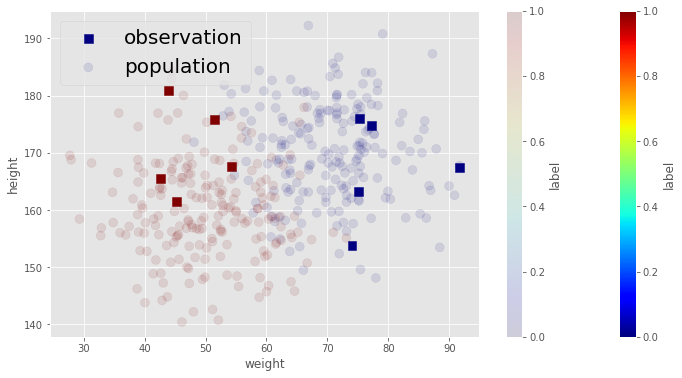

In [3]:
def plot_base(population, sample):
    plt.figure()
    ax = plt.gca()
    sample.plot.scatter(x='weight',y='height',c='label',marker='s', s=80,figsize=(12,6),ax=ax, cmap='jet', label="observation")
    population.plot.scatter(x='weight',y='height',c='label',alpha=0.1,s=80,figsize=(12,6),ax=ax, cmap='jet', label="population")
    plt.legend(loc='upper left',prop={'size': 20})


plot_base(population, sample)

## Model training

Remember we only have access to the sample data, let's train a model that best explains them.

<AxesSubplot:xlabel='weight', ylabel='height'>

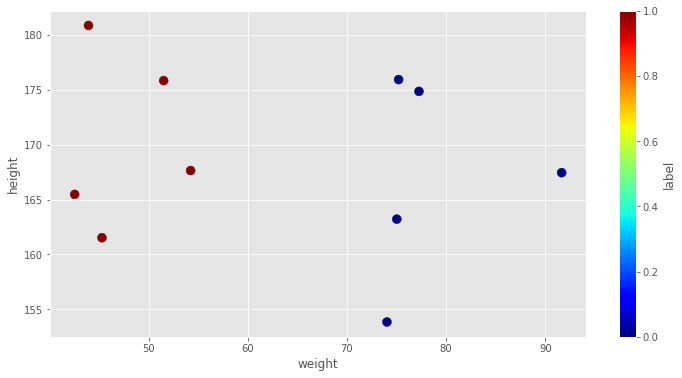

In [4]:
plt.figure()
ax = plt.gca()
sample.plot.scatter(x='weight',y='height',c='label',s=80,figsize=(12,6),ax=ax,cmap='jet')

## Decision Trees

* Non-parametric supervised learning
* Easy to interpret (explanable model)


Consider the following classic example. Roger likes to play tennis but he decides to play or not based on weather conditions. Here are our observation about him.

In [5]:
tennis = '''
Outlook,Temperature,Humidity,Wind,Play Tennis
Sunny,Hot,High,Weak,No
Sunny,Hot,High,Strong,No
Overcast,Hot,High,Weak,Yes
Rain,Mild,High,Weak,Yes
Rain,Cool,Normal,Weak,Yes
Rain,Cool,Normal,Strong,No
Overcast,Cool,Normal,Strong,Yes
Sunny,Mild,High,Weak,No
Sunny,Cool,Normal,Weak,Yes
Rain,Mild,Normal,Weak,Yes
Sunny,Mild,Normal,Strong,Yes
Overcast,Mild,High,Strong,Yes
Overcast,Hot,Normal,Weak,Yes
Rain,Mild,High,Strong,No
'''

In [6]:
from io import StringIO

tennis_df = pd.read_csv(StringIO(tennis))
tennis_df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### Can you predict whether he is going to play tennis given a certain combination of weather conditions?

Let's take a look at the pattern...

- he always play when outlook is overcast
- he is not playing if it's raining with strong wind
- etc.

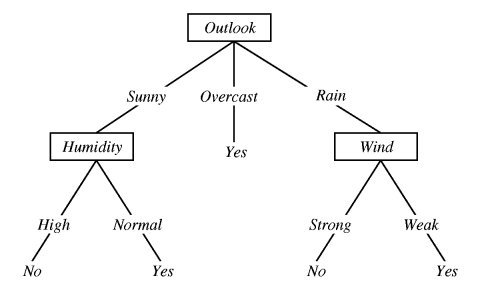

Can we derive this kind of logic automatically? Yes!


### Decision Tree Algorithm

Each round, we will choose a attribute (feature) to look at grow the tree as we go. Two questions we have to answers:

1. How exactly are we going to choose the feature?
2. Where in the tree we are growing new node?


#### Deciding which attributes


Let's think about this? If we knows nothing about Roger, and we can ask him a question to learn more about him. Which question do you ask?

- How often do you play in each outlook?

or 

- How often do you play in different temperature? 
 
 

How do we formalize this?
 
 
#### Entropy and Information Gain

Let's understand entropy:

$$
\text{Entropy}(S) = - P(\text{Yes}) \log_2 P(\text{Yes}) – P(\text{No}) . \log_2 P(\text{No})
$$

At the begining, given a new weather condition, if we have to make an educated guess, we should guess 'Yes' why?

Based on the data we have, there are 9 yes's and 5 no's. Here at this stage, we say that the entropy of play is

$$
-(9/14) \log_2 (9/14) - (5/14) \log_2 (5/14) = 0.94
$$


As we learn more about Roger, we will be more certain in our prediction. The entropy of play will go down. 

**Summary**

- Entropy is highest when it's 50-50
- It gets to the lowest point when it's certain
- High entropy --> High uncertainty --> Low certainty
- Low entropy --> Low uncertainty --> High uncertainty


Now that we have formalize the concept of entropy, let's talk about information gain or (IG).

The information gain is based on the decrease in entropy after a dataset is split on an attribute.
Constructing a decision tree is all about finding attribute that returns the highest information gain.

$$
\text{IG}(S, A) = \text{Entropy}(S) – \sum_A P(S|A) \text{Entropy}(S|A)
$$



**Summary:** IG describes how much do you learn after obtaining some information



Let's compare IG of asking about "Outlook" vs "Temperature"

In [7]:
tennis_df[tennis_df['Outlook'] == 'Sunny']

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes


In [8]:
ent_sunny = -(2/5)*np.log2(2/5)-(3/5)*np.log2(3/5)
ent_sunny

0.9709505944546686

In [9]:
tennis_df[tennis_df['Outlook'] == 'Overcast']

,Outlook,Temperature,Humidity,Wind,Play Tennis
2,Overcast,Hot,High,Weak,Yes
6,Overcast,Cool,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes


In [10]:
eps = 1e-7
ent_overcast = -(4/4)*np.log2(4/4)-(0/4)*np.log2(0/4 + eps)
ent_overcast

0.0

In [11]:
tennis_df[tennis_df['Outlook'] == 'Rain']

,Outlook,Temperature,Humidity,Wind,Play Tennis
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
9,Rain,Mild,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


In [12]:
ent_rain = -(3/5)*np.log2(3/5)-(2/5)*np.log2(2/5)
ent_rain

0.9709505944546686

In [13]:
ent_play = -(9/14)*np.log2(9/14) -(5/14)*np.log2(5/14)

ig_outlook = ent_play - (5/14)*ent_sunny - (4/14)*ent_overcast - (5/14)*ent_rain
ig_outlook

0.24674981977443933

## Exercise

<div class="alert alert-block alert-success">
    <b>Your task:</b> Find IG of learning about "temperature"
 </div>

### Building a DT model

We will be building a Decision Tree model by using a common machine learning library known as *sklean*. 

A general flow is

1. Prepare the training data and labels as NumPy arrays:

```
training_data =
[[f_11,f_12,f_13,...,f_1m],   # Observation 1
 [f_21,f_22,f_23,...,f_2m],   # Observation 2
 [f_31,f_32,f_33,...,f_3m],   #     ...
 ...
 [f_n1,f_n2,f_n3,...,f_nm]    # Observation n 
]

labels =
[l_1,l_2,l_3, ... , l_n]  # n labels

```

2. Create a classifier

```
clf = DecisionTreeClassifier(criterion='entropy')

```

3. Fit the data

```
clf.fit(training_data, labels)
```

4. Use the model to predict new example

```
new_ob = [f_1,f_2,...,f_m]

clf.predict([new_ob]) # ==> [[predicted_label]]
```

In [14]:
# We have to preprocess data from strings to ints
# e.g. Sunny => 2, Rain => 1

from sklearn import preprocessing
string_to_int = preprocessing.LabelEncoder()                    
df = tennis_df.apply(string_to_int.fit_transform)
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [15]:
X = df[['Outlook', 'Temperature', 'Humidity', 'Wind']].to_numpy()
X

array([[2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 2, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [2, 2, 0, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 1],
       [2, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [1, 2, 0, 0]])

In [16]:
Y = df['Play Tennis']
Y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play Tennis, dtype: int32

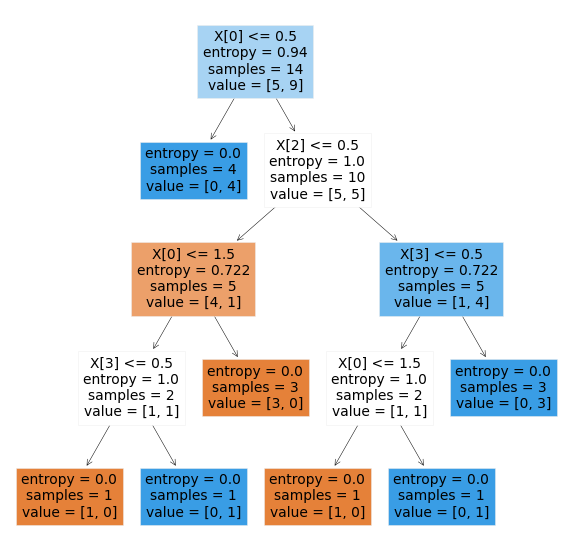

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(10,10))
tennis_dt = DecisionTreeClassifier(criterion='entropy')
tennis_dt.fit(X,Y)
plot_tree(tennis_dt, filled=True)
plt.show()

## Exercise

<div class="alert alert-block alert-success">
    <b>Your task:</b> Build a DT for the gender classification task above
 </div>

## Making prediction

Now that we have trained a model, we are ready to use it to make predictions.

In [18]:
new_observation = string_to_int.fit_transform(['Sunny', 'Mild', 'Normal', 'Strong'])
tennis_dt.predict([new_observation])

array([1])

## Evaluate your model

How do you know whether your model is doing well? Let's try our model on the training data.

In [19]:
tennis_dt.predict(X)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [20]:
tennis_dt.predict(X) == Y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: Play Tennis, dtype: bool

From the above results, our predictions were great. Our accuracy is 100% as our predictions match with the given labels exactly. But, does this mean our model is good?

Not really. Because our model was created based on these examples, it's not that surprising to see it performs well on these examples. **Low training error** is usually expected from reasonable learning algorithms.  After all, we are training a model to perform well on the population rather than the sample. Practically, we cannot test on the population so the best we can hope for is to perform well on **another** sample. 

Normally, when training a model, we prepare 2 samples: one for training and another for testing. It is important that we are not using test data during the training phase at all to ensure valid evaluation. Let's repeat the tennis experiment again but this time we are going to generate 2 samples: training and test.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

In [22]:
tennis_dt = DecisionTreeClassifier(criterion='entropy')
tennis_dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

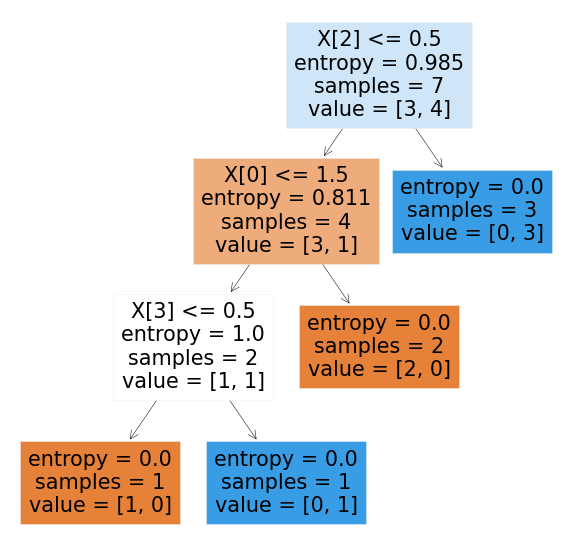

In [23]:
plt.figure(figsize=(10,10))
plot_tree(tennis_dt, filled=True)
plt.show()

In [24]:
train_acc = (Y_train == tennis_dt.predict(X_train)).sum()/len(Y_train)
print('train:', train_acc)

train: 1.0


In [25]:
test_acc = (Y_test == tennis_dt.predict(X_test)).sum()/len(Y_test)
print('test:', test_acc)

test: 0.7142857142857143


### Overfitting and Underfitting

- A model is **overfitting** when it's performing well on the training data but poorly on the test set. 
- A model is **underfitting** when it's performing poorly even on the training data.

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

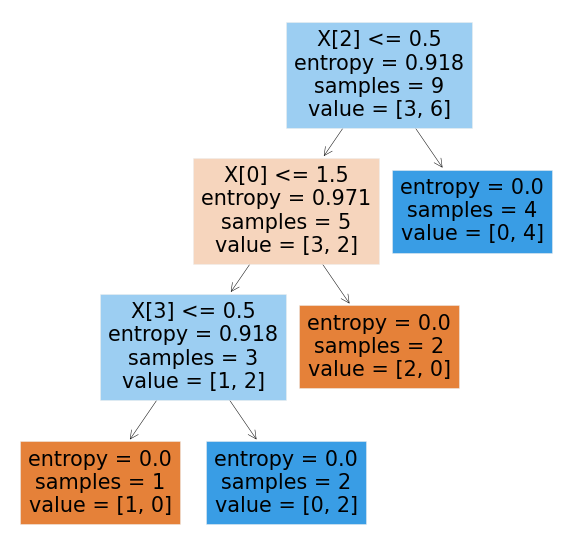

train: 1.0
test: 0.6


In [27]:
tennis_dt = DecisionTreeClassifier(criterion='entropy', max_depth=10)
tennis_dt.fit(X_train,Y_train)

plt.figure(figsize=(10,10))
plot_tree(tennis_dt, filled=True)
plt.show()

train_acc = (Y_train == tennis_dt.predict(X_train)).sum()/len(Y_train)
print('train:', train_acc)

test_acc = (Y_test == tennis_dt.predict(X_test)).sum()/len(Y_test)
print('test:', test_acc)

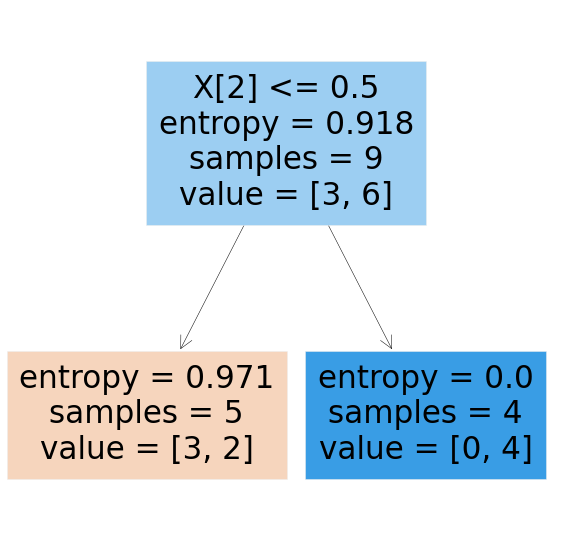

train: 0.7777777777777778
test: 0.6


In [28]:
tennis_dt = DecisionTreeClassifier(criterion='entropy', max_depth=1)
tennis_dt.fit(X_train,Y_train)

plt.figure(figsize=(10,10))
plot_tree(tennis_dt, filled=True)
plt.show()

train_acc = (Y_train == tennis_dt.predict(X_train)).sum()/len(Y_train)
print('train:', train_acc)

test_acc = (Y_test == tennis_dt.predict(X_test)).sum()/len(Y_test)
print('test:', test_acc)

## Exercise

<div class="alert alert-block alert-success">
    <b>Your task:</b> Evaluate your gender classification model
 </div>